# Model 5 - Simple fault

I want to create 3-4 simple models in order to show the effect of the distance algorithm for Kriging and how it can be applied to Gempy models. In general I think 3 Layers should be fine, cutting out the central one. Keeping all in the same size around max 5000 grid points gives reasonable calculation times.
1) flat horizontal 
2) anticline 
3) recumbent anticline
4) layer pinching out ?
5) should be something like a fault

In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import pandas as pd

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
geo_data1 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice_offsetC.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice_offsetC.csv")

geo_data2 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice_offsetB.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice_offsetB.csv")

geo_data3 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice.csv")


In [3]:
gp.set_series(geo_data1, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0) 

gp.set_series(geo_data2, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0)

gp.set_series(geo_data3, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0)

In [4]:
colormodel = {'basement':'#ffa700','rock1':'#d62d20','rock2':'#0057e7','rock3':'#008744','fault':'#17202a'}
geo_data1.set_colors(colormodel)
geo_data2.set_colors(colormodel)
geo_data3.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data1.formations['color'])[1:])
#geo_data.formations

In [5]:
#%matplotlib inline
#gp.plotting.plot_data(geo_data1, direction='y')

In [6]:
interp_data1 = gp.InterpolatorData(geo_data1, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [7]:
interp_data2 = gp.InterpolatorData(geo_data2, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [8]:
interp_data3 = gp.InterpolatorData(geo_data3, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [9]:
lith_block1, fault_block1 = gp.compute_model(interp_data1)
lith_block2, fault_block2 = gp.compute_model(interp_data2)
lith_block3, fault_block3 = gp.compute_model(interp_data3)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


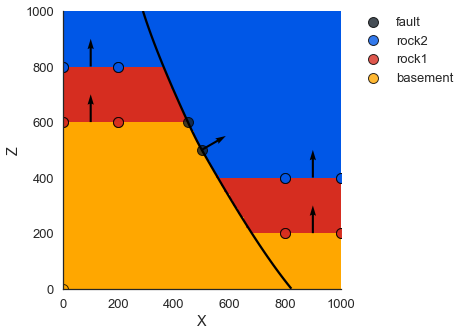

In [10]:
%matplotlib inline
gp.plotting.plot_section(geo_data3, lith_block3[0], cell_number=1,
                        direction='y', plot_data=True, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data3, interp_data3, cell_number=1,
                         direction='y', fb=fault_block3)

plt.savefig(fname='Model5_pure_legend', edgecolor='black', bbox_inches="tight")

In [11]:
import gempy.utils.Kriging_Jan as krige

In [12]:
d = {'X': [200, 200], 'Y': [10, 10], 'Z': [700,700], 'Property': [20, 20]}
data_field = pd.DataFrame(data=d)
print(data_field)

     X   Y    Z  Property
0  200  10  700        20
1  200  10  700        20


In [13]:
np.random.seed(10)

In [14]:
np.random.seed(10000)
test1 = krige.Kriging(data_field, lith_block1, geo_data1, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block1, an_factor=1, offset=115, var_par=(200,50,1), 
                     fz_ext=(400,440))

np.random.seed(10000)
test2 = krige.Kriging(data_field, lith_block2, geo_data2, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block2, an_factor=3, offset=280, var_par=(200,50,1), 
                     fz_ext=(400,510))

np.random.seed(10000)
test3 = krige.Kriging(data_field, lith_block3, geo_data3, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block3, an_factor=5, offset=470, var_par=(200,50,1), 
                     fz_ext=(400,600))

initializing: 0.01198720932006836
Fault: True
120.74094127911009
1
distance precalculation: 74.83672404289246
submatrix extraction: 0.008028030395507812
distance Matrices: 0.42470693588256836
kriging calculation: 0.6256904602050781
Negative Variances: 0
Out of: 3817
initializing: 0.014992237091064453
Fault: True
290.02254717951706
3
distance precalculation: 65.62743043899536
submatrix extraction: 0.004995822906494141
distance Matrices: 0.26085352897644043
kriging calculation: 0.4257369041442871
Negative Variances: 0
Out of: 3505
initializing: 0.01099395751953125
Fault: True
477.3059182605855
5
distance precalculation: 55.79588985443115
submatrix extraction: 0.00899505615234375
distance Matrices: 0.25382351875305176
kriging calculation: 0.42881035804748535
Negative Variances: 0
Out of: 3151


In [15]:
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    X, Y = meshgrid(xi, yi)
    return X, Y, Z

In [16]:
coord = test1.result_coord[:3]
result = test1.kriging_result[1]
combined = np.vstack((coord, result))
combined = np.swapaxes(combined,0,1)

combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,0]<460)[0]
combined_cut_left = combined_cut[combined_cut_left]

combined_cut_right = np.where(combined_cut[:,0]>460)[0]
combined_cut_right = combined_cut[combined_cut_right]

colormodel = {'basement':'#696969','rock1':'#A0A0A0','rock2':'#BEBEBE','rock3':'#008744','fault':'#000000'}
geo_data1.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data1.formations['color'])[1:])
#geo_data.formations

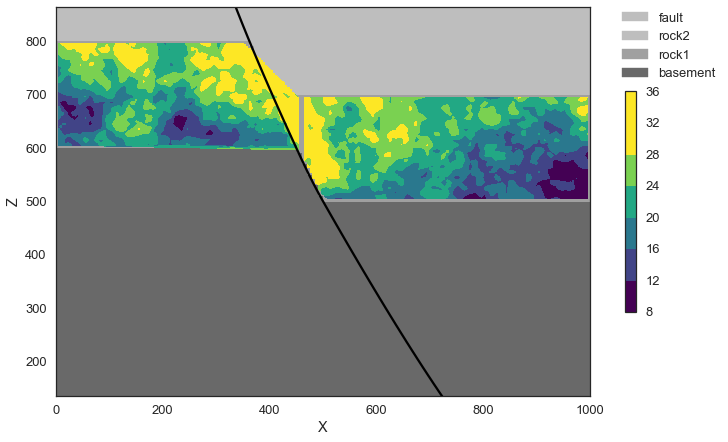

In [17]:
X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm = matplotlib.colors.Normalize(vmin=10.,vmax=30.)
a = plt.contourf(X1, Y1, Z1, cmap='viridis', norm=norm)
b = plt.contourf(X2, Y2, Z2, cmap='viridis', norm=norm)

gp.plotting.plot_section(geo_data1, lith_block1[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data1, interp_data1, cell_number=1,
                         direction='y', fb=fault_block1)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Fault_200_50_1_an=1_B_off462', edgecolor='black', bbox_inches='tight')

In [18]:
coord = test2.result_coord[:3]
result = test2.kriging_result[1]
combined = np.vstack((coord, result))
combined = np.swapaxes(combined,0,1)

combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,0]<460)[0]
combined_cut_left = combined_cut[combined_cut_left]

combined_cut_right = np.where(combined_cut[:,0]>460)[0]
combined_cut_right = combined_cut[combined_cut_right]

colormodel = {'basement':'#696969','rock1':'#A0A0A0','rock2':'#BEBEBE','rock3':'#008744','fault':'#000000'}
geo_data2.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data2.formations['color'])[1:])
#geo_data.formations

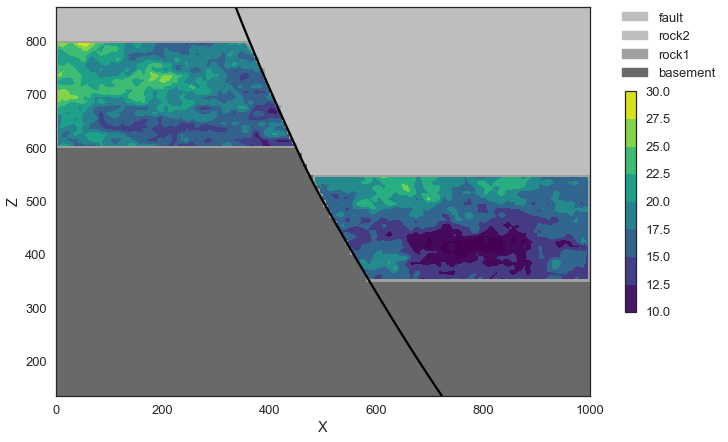

In [19]:
X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm = matplotlib.colors.Normalize(vmin=10.,vmax=30.)
a = plt.contourf(X1, Y1, Z1, cmap='viridis', norm=norm)
b = plt.contourf(X2, Y2, Z2, cmap='viridis', norm=norm)

gp.plotting.plot_section(geo_data2, lith_block2[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data2, interp_data2, cell_number=1,
                         direction='y', fb=fault_block2)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Fault_200_50_1_an=3_B_off462', edgecolor='black', bbox_inches='tight')

In [20]:
coord = test3.result_coord[:3]
result = test3.kriging_result[1]
combined = np.vstack((coord, result))
combined = np.swapaxes(combined,0,1)

combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,0]<460)[0]
combined_cut_left = combined_cut[combined_cut_left]

combined_cut_right = np.where(combined_cut[:,0]>460)[0]
combined_cut_right = combined_cut[combined_cut_right]

colormodel = {'basement':'#696969','rock1':'#A0A0A0','rock2':'#BEBEBE','rock3':'#008744','fault':'#000000'}
geo_data3.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data3.formations['color'])[1:])
#geo_data.formations

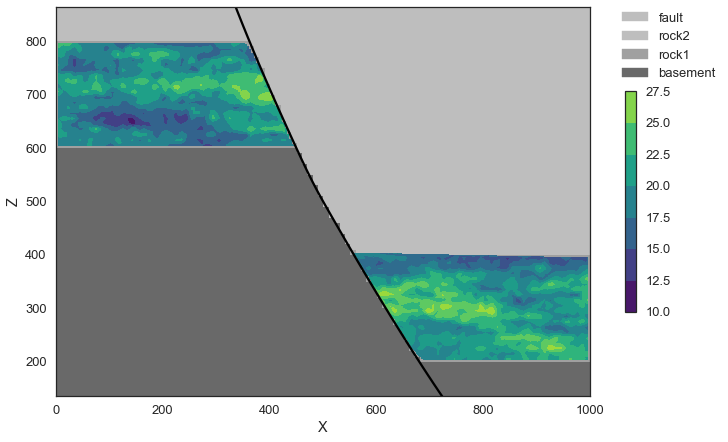

In [21]:
X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm = matplotlib.colors.Normalize(vmin=10.,vmax=30.)
a = plt.contourf(X1, Y1, Z1, cmap='viridis', norm=norm)
b = plt.contourf(X2, Y2, Z2, cmap='viridis', norm=norm)

gp.plotting.plot_section(geo_data3, lith_block3[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data3, interp_data3, cell_number=1,
                         direction='y', fb=fault_block3)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Fault_200_50_1_an=5_B_off462', edgecolor='black', bbox_inches='tight')

In [22]:
coord_dist = test1.result_coord[:3]
dist_plt = test1.dist_matrix_plt[1]

In [23]:
combined = np.vstack((coord_dist, dist_plt))
combined = np.swapaxes(combined,0,1)

combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3]]

In [24]:
# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,0]<460)[0]
combined_cut_left = combined_cut[combined_cut_left]

combined_cut_right = np.where(combined_cut[:,0]>460)[0]
combined_cut_right = combined_cut[combined_cut_right]

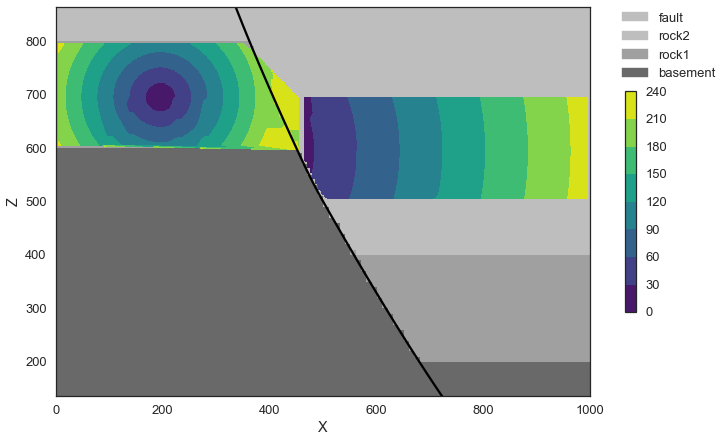

In [25]:
X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

a = plt.contourf(X1, Y1, Z1, cmap='viridis')
b = plt.contourf(X2, Y2, Z2, cmap='viridis')

gp.plotting.plot_section(geo_data3, lith_block3[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data3, interp_data3, cell_number=1,
                         direction='y', fb=fault_block3)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Fault_200_50_1_an=100_B_off462', edgecolor='black')